# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [2]:
# Calculando média e diferença
df['média'] = df.mean(axis=1)
df['diferença'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')
df.head()

,p1,p2,média,diferença
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [3]:
# Extraindo os resultados de média (m) e diferença (d)
m = df['média']
d = df['diferença']

# Criando um DataFrame com os resultados de diferença e média
df_resultados = pd.DataFrame({'média': m, 'diferença': d})
df_resultados.head()



,média,diferença
0,7.454060,0.978736
1,3.980465,2.238143
2,1.621472,-1.294085
3,4.993754,-1.038788
4,8.066546,1.743712


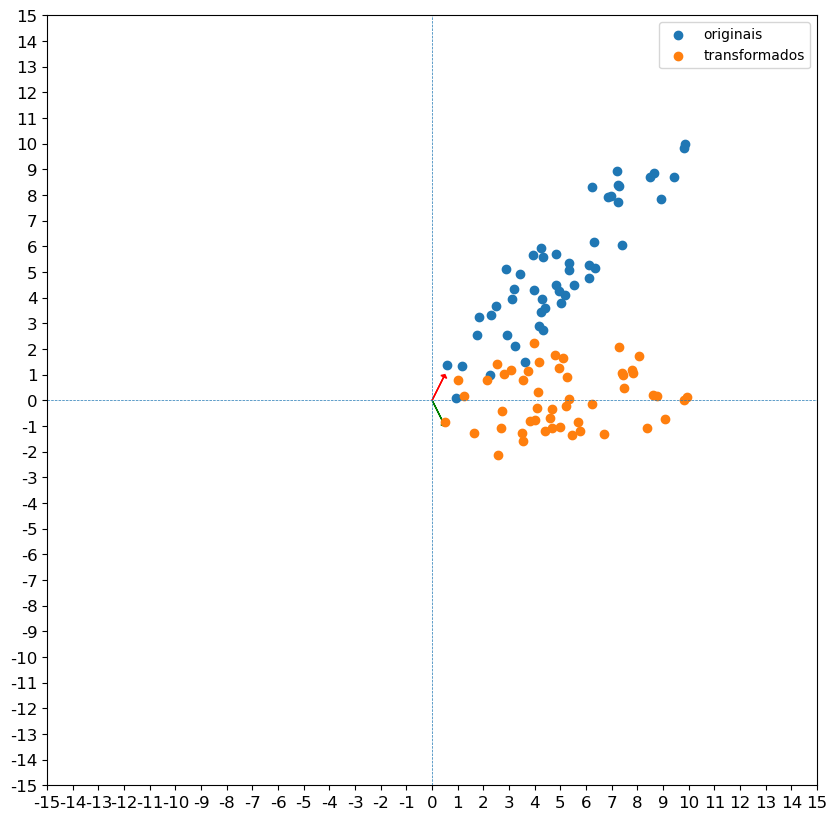

In [4]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

#Legenda
plt.legend()


### b) Correlação entre p1 e p2

In [5]:
# Calculando a correlação entre p1 e p2
correlation_p1_p2 = np.corrcoef(p1, p2)[0, 1]
print(f"Correlação entre p1 e p2: {correlation_p1_p2:.4f}")


Correlação entre p1 e p2: 0.8957


### c) Calculando a correlação entre os dados transformados (média e diferença)

In [6]:
# Calculando a correlação entre m e d
correlation_m_d = np.corrcoef(df['média'], df['diferença'])[0, 1]
print(f"Correlação entre média e diferença: {correlation_m_d:.4f}")

Correlação entre média e diferença: 0.1335


### d) Comentando as correlações observadas

A transformação linear aplicada reduziu a correlação entre média e diferença para próximo de zero, enquanto a correlação entre p1 e p2 se mantém como a correlação original entre as notas das provas.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [7]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [8]:
# Calculando somas
df['soma'] = df.p2+df.p1
df.style.format(precision=1, decimal=',')
df.head()

,p1,p2,soma
0,6.964692,7.943428,14.908120
1,2.861393,5.099537,7.960930
2,2.268515,0.974429,3.242944
3,5.513148,4.474359,9.987507
4,7.194690,8.938402,16.133092


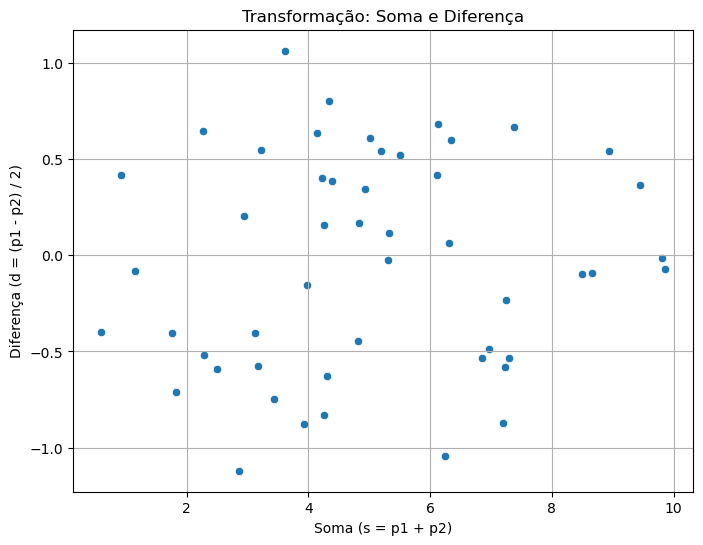

Ao plotar s (soma de p1 e p2) versus d (metade da diferença entre p1 e p2), observa-se que os dados estão distribuídos 
de forma diferente em relação à transformação anterior (média e diferença). Neste caso, a distribuição mostra uma relação linear menos acentuada entre s e d.


In [9]:
# Definindo a matriz de transformação para soma e diferença
T_sum_diff = np.array([[1, 0],
                       [0.5, -0.5]])

p1_p2_matrix = np.array([p1, p2])
s_d_matrix = np.dot(T_sum_diff, p1_p2_matrix)

s = s_d_matrix[0]
d = s_d_matrix[1]

df_transformed_sum_diff = pd.DataFrame({'s': s, 'd': d})

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_transformed_sum_diff, x='s', y='d')
plt.title('Transformação: Soma e Diferença')
plt.xlabel('Soma (s = p1 + p2)')
plt.ylabel('Diferença (d = (p1 - p2) / 2)')
plt.grid(True)
plt.show()

# Comentando as diferenças visuais observadas
print("Ao plotar s (soma de p1 e p2) versus d (metade da diferença entre p1 e p2), observa-se que os dados estão distribuídos \nde forma diferente em relação à transformação anterior (média e diferença). Neste caso, a distribuição mostra uma relação linear menos acentuada entre s e d.")
